# Assignment 3

## Guidelines

> Remember that this is a code notebook - add an explanation of what you do using text boxes and markdown, and comment your code. Answers without explanations may get less points.
>
> If you re-use a substantial portion of code you find online, e.g on Stackoverflow, you need to add a link to it and make the borrowing explicit. The same applies of you take it and modify it, even substantially. There is nothing bad in doing that, providing you are acknowledging it and make it clear you know what you're doing.
>
> The **Generative AI policy** from the syllabus for the programming assignments applies. Generative AI can be used as a source of information in these assignments if properly referenced. You can use generative AI assistance for writing code, but you must reference the chat used as a source, just as if you would take from StackOverflow. In ChatGPT, you can make an URL to the information you obtained by clicking the "Share link to Chat" button and then "Copy Link". This allows you to cite the source of the information you use in your answer or code solution. Of course, as you know, GenAI tools are not always a reliable source and its answers are intransparantly drawn from other sources - it is recommended to cross-check its output with other sources or your own understanding of the topic.
> 
> For the explanations of what you do that you provide with each question, as well as for (sub)questions that ask about things like motivation of choices or your opinion, the answer to this must be conceptualized and written by yourself and not copied from a generative AI source.
>
> Make sure your notebooks have been run when you submit, as I won't run them myself. Submit both the `.ipynb` file along with an `.html` export of the same. Submit all necessary auxilliary files as well. Please compress your submission into a `.zip` archive. Only `.zip` files can be submitted.
> If you are using Google Colab, here is a tutorial for obtaining an HTML export: https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab .
>
> With Jupyter, you can simply export it as HTML through the File menu.

## Grading policy
> As follows:
>
> * 80 points for correctly completing the assignment.
>
> * 20 points for appropriately writing and organizing your code in terms of structure, readibility (also by humans), comments and minimal documentation. It is important to be concise but also to explain what you did and why, when not obvious. Feel free to re-use functions and variables from previous questions if that helps for structure and readability - you do not need to repeat previous steps for each question.
> 
> Note that there are no extras for this assignment, as all 100 points are accrued via questions and question 6 has 10 'advanced' points to get.

**The AUC code of conduct applies to this assignment: please only submit your own work and follow the instructions on referencing external sources above.**

---

# Introduction

In this assignment, you will build and compare classifiers for measuring the **sentiment of tweets related to COVID-19** from the early days of the first outbreak.

The dataset you will work with is [publicly available in Kaggle](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification) (and attached to the assignment for your convenience). Make sure to check its minimal Kaggle documentation before starting.

This is a real dataset, and therefore messy. It is possible that you won't achieve great results on the classification task with your classifier. That is normal, don't worry about it! You also may find text encoding issues with this dataset. Try to find a simple solution to this problem, I don't think there is an easy way to fix it completely for these files.

*Please note: this dataset should not but might contain content which could be considered as offensive.*

---

# Skeleton pipeline (20 points)

## Question 1 (8 points)

Your dataset contains tweets, including handlers, hashtags, URLs, etc. Set-up a **minimal pre-processing pipeline** for them (focus on the `OriginalTweet` column), possibly including:

* Tokenization
* Filtering
* Lemmatization/Stemming

Please note that what to include is up to you, motivate your choices and remember that more is not necessarily better: if you are not sure why you are doing something, it might be better not to. Feel free to use NLTK, spaCy or anything else you like here.

*Note: we only really use the `OriginalTweet` and `Sentiment` columns for this assignment.*

In [1]:
# your code here

import numpy as np
import pandas as pd
from pathlib import Path

DATA_PATH = Path.cwd() / "data/Corona_NLP_train.csv"

# the file is not UTF-8 encoded, so change encoding
df_data = pd.read_csv(DATA_PATH, encoding = "latin1")
df_data = df_data[["OriginalTweet", "Sentiment"]]
print(df_data.head())
print(df_data.info())

                                       OriginalTweet           Sentiment
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral
1  advice Talk to your neighbours family to excha...            Positive
2  Coronavirus Australia: Woolworths to give elde...            Positive
3  My food stock is not the only one which is emp...            Positive
4  Me, ready to go at supermarket during the #COV...  Extremely Negative
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB
None


In [2]:
import spacy

nlp = spacy.load("en_core_web_sm",
                exclude=["tok2vec", "parser", "ner"])

texts = df_data["OriginalTweet"]

def doc_to_string(doc) -> str:
    """
    Reformats strings returned by the SpaCy pipeline
    """
    
    s = ""
    for token in doc:
        if len(str(token)) > 2:
            s += ''.join([
                char for char in str(token).lower()
                if char.isalpha()
            ]) + ' '

    return s.rstrip()

docs = [doc_to_string(doc) for doc in nlp.pipe(texts)]

df_data["OriginalTweet"] = docs
print(df_data.head())

                                       OriginalTweet           Sentiment
0  menyrbie philgahan chrisitv httpstcoifzfan and...             Neutral
1  advice talk your neighbours family exchange ph...            Positive
2  coronavirus australia woolworths give elderly ...            Positive
3  food stock not the only one which empty   plea...            Positive
4  ready supermarket during the covid outbreak  n...  Extremely Negative


<h3> EXPLANATION </h3>

I loaded the file, which was formatted using the "latin1" encoding. I only kept two columns of interest, i.e. `OriginalTweet` and `Sentiment`. I preprocessed the tweets using a SpaCy pipeline with a custom function that only keeps lower case alphabetic characters of length 3 or more, thus eliminating any links, punctuations, special characters, and so on.

---

## Question 2 (4 points)

**Split your data into a train and a validation set**. You can use 85% for training and 15% for validation, or similar proportions. Remember to shuffle your data before splitting, specifying a seed to be able to replicate your results.

In [3]:
# your code here

from sklearn.model_selection import train_test_split

(X_val, X_train,
 y_val, y_train) = train_test_split(
     df_data["OriginalTweet"], df_data["Sentiment"], test_size = 0.85, random_state = 777
 )

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(34984,) (6173,) (34984,) (6173,)


---

## Question 3 (8 points)

Write a function which, given as input a set of predictions and a set of ground truth labels and the name of the method, prints out a **classification report** including:
* Name of the method
* Accuracy
* Precision, recall and F1 measure
* An example of a correctly classified datapoint (e.g. a tweet)
* An example of a wrongly classified datapoint

*Note: You can do this question at the same time as question 4 so that you have something to report (the result of the baseline)*

In [4]:
# your code here

from sklearn.metrics import confusion_matrix

# LABELS = np.unique(df_data["Sentiment"])
LABELS = ["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"]

def classification_report(pred, truth, data, model: str):
    """
    Prints a classification report for a given method
    """
    global LABELS

    print(f"Results for {model}")

    total_correct = np.sum(pred == truth)
    accuracy = total_correct / len(truth)
    print(f"Accuracy:   {round(accuracy*100, 1)}%")
    
    cm = confusion_matrix(truth, pred, labels=LABELS)
    # print(labels, cm)

    # rows = underlying class
    # cols = labelled class
    row_sums = np.sum(cm, axis = 1)
    col_sums = np.sum(cm, axis = 0)
    
    for i, label in enumerate(LABELS):
        print(f"\nScores for class \"{label}\"")
        
        t_pos = cm[i, i]
        f_neg = row_sums[i] - t_pos
        f_pos = col_sums[i] - t_pos
        t_neg = total_correct - t_pos
        
        precision = t_pos / (t_pos + f_pos)
        recall = t_pos / (t_pos + f_neg)
        f_measure = 2 * ((precision * recall) / (precision + recall))
        print(f"Precision:  {round(precision * 100, 1)}%")
        print(f"Recall:     {round(recall * 100, 1)}%")
        print(f"F1 Measure: {round(f_measure * 100, 1)}%")

    first_correct = np.where(pred == truth)[0][0]
    # where()[0] returns indices
    print(f"\nTweet correctly identified as {pred[first_correct]}:\n>> {data.iloc[first_correct]}")
    
    first_wrong = np.where(pred != truth)[0][0]
    print(f"\nTweet incorrectly labelled as {pred[first_wrong]} instead of {truth.iloc[first_wrong]}:")
    print(f">> {data.iloc[first_wrong]}")

---

# Classifying (45 points)

As you will be performing classification on real data, processes may take a while to run. This is normal, but it should not take hours. Here's some advice if you find that some of your code takes a long time to run:
- If you are doing a hyperparameter search, try to make it quite small. Every hyperparameter combination that you try means training a new model, and runtimes can explode. You do not need to do a huge search for this assignment, it is enough if I can see that you are able to do it with a small example.
- If you are doing a grid search, try to know how many combinations of hyperparameters your code will check and try to have print statements to know where you are at. Computation time grows exponentially for each additional hyperparameter option so this can get out of hand quickly. Also, if training a single model as a step of your grid search takes longer than just training the model separately, there might be an issue with your grid search code.
- In a real project, you would want to make your code such that you can pause and resume training or optimization without having to re-do everything, e.g. by writing the results to a file. But for the purpose of this assignment it is not necessary to make it that complicated.
- Use separate code blocks especially for the part of code that trains a model. That way, you only need to run the training step once, while you can mess around with the output/evaluation etc. without having to wait for a new model to be trained each time.

## Question 4 (10 points)

An important first step when dealing with a real-world task is establishing a **solid baseline**. The baseline allows to a) develop the first full pipeline for your task, and b) to have something to compare against when you develop more advanced models.

Pick a method to use as a baseline. *A good option might be a TF-IDF Logistic Regression*. Feel free to use scikit-learn or another library of choice. See [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) for more options.

Use your classification report function and the validation set to report on the performance of your baseline. *Pay attention: the validation data only needs to be transformed, and must not be used to fit any transformation. For example, if you have used a TF-IDF vectorizer by fitting it to your train data and then transformed it, use the same fitted vectorizer to transform your validation data.*

In [5]:
# your code here

from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
from sklearn.linear_model import LogisticRegression

tfidf = TFIDF(
    max_df = 0.5,
    min_df = 2
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val) # do not fit!

tfidf_logreg = LogisticRegression(solver = "sag")
tfidf_logreg.fit(X_train_tfidf, y_train)
# no transformation needed for logistic regression
y_pred_tfidf_logreg = tfidf_logreg.predict(X_val_tfidf)

classification_report(y_pred_tfidf_logreg, y_val, X_val, "TF-IDF Logistic Regression")

Results for TF-IDF Logistic Regression
Accuracy:   56.9%

Scores for class "Extremely Negative"
Precision:  62.7%
Recall:     48.2%
F1 Measure: 54.5%

Scores for class "Negative"
Precision:  51.3%
Recall:     51.0%
F1 Measure: 51.2%

Scores for class "Neutral"
Precision:  64.4%
Recall:     67.9%
F1 Measure: 66.1%

Scores for class "Positive"
Precision:  51.6%
Recall:     60.9%
F1 Measure: 55.8%

Scores for class "Extremely Positive"
Precision:  65.4%
Recall:     52.5%
F1 Measure: 58.2%

Tweet correctly identified as Negative:
>> gps warn hidden medical cost coronavirus httpstcokirsfqvy

Tweet incorrectly labelled as Negative instead of Neutral:
>> wall streetâs rally fizzles oil prices suddenly plunge coronavirus covid httpstcogyffpykbz httpstcoxewwglbarm


<h3> EXPLANATION </h3>

I at first thought the choice of using logistic regression was strange because the dataset has five possible classes, while logistic regression is only suitable for handling binary classification problems. It turns out that the `scikit-learn` logistic regression model is capable of handling multinominal cases as well.

I first transformed the tweets using a TF-IDF Vectoriser, setting upper and lower bounds for document frequency because both highly frequent and infrequent terms are likely uninformative. I fitted the logistic regression using the SAG (stochastic average gradient) solver because the default LBFGS solver takes far too long for what is only going to be used as a baseline model.

This baseline model gives us an overall accuracy of 57%, which is not too bad, considering that the default accuracy of a random model is only 20%.

---

## Question 5 (20 points)

Try now to **beat your baseline**. Feel free to use scikit-learn or another library of choice. See [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) for more options.

How to beat the baseline? There are many ways:
1. You could have a better text representation (e.g., using PPMI instead of TF-IDF, note that this is challenging because there is no ready-made scikit-learn vectorizer for this).
2. You can pick a more powerful model (e.g., random forests or SVMs).
3. You have to find good hyperparameters for your model, and not just use the default ones.

Regarding point 3 above, make sure to perform some hyperparameter searching using [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [randomized search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Use your classification report function and the validation set to report on the performance of your baseline. *Pay attention: the validation data only needs to be transformed, and must not be used to fit any transformation. For example, if you have used a TF-IDF vectorizer by fitting it to your train data and then transformed it, use the same fitted vectorizer to transform your validation data.*

In [6]:
# your code here

from sklearn.decomposition import TruncatedSVD as TSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# first reduce dimensions with SVD
svd = TSVD(n_components = 2500, random_state = 1)
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf)
X_val_tfidf_svd = svd.transform(X_val_tfidf)

lda = LDA(solver = "svd")
lda.fit(X_train_tfidf_svd, y_train)
y_pred_tfidf_lda = lda.predict(X_val_tfidf_svd)

classification_report(y_pred_tfidf_lda, y_val, X_val, "TF-IDF Linear Discriminant Analysis with TSVD")

Results for TF-IDF Linear Discriminant Analysis with TSVD
Accuracy:   59.9%

Scores for class "Extremely Negative"
Precision:  63.2%
Recall:     57.9%
F1 Measure: 60.5%

Scores for class "Negative"
Precision:  54.0%
Recall:     51.6%
F1 Measure: 52.7%

Scores for class "Neutral"
Precision:  63.9%
Recall:     68.3%
F1 Measure: 66.0%

Scores for class "Positive"
Precision:  55.9%
Recall:     62.3%
F1 Measure: 58.9%

Scores for class "Extremely Positive"
Precision:  70.6%
Recall:     59.9%
F1 Measure: 64.8%

Tweet correctly identified as Negative:
>> gps warn hidden medical cost coronavirus httpstcokirsfqvy

Tweet incorrectly labelled as Negative instead of Neutral:
>> wall streetâs rally fizzles oil prices suddenly plunge coronavirus covid httpstcogyffpykbz httpstcoxewwglbarm


<h3> EXPLANATION </h3>

I took a somewhat lazy approach and kept the TF-IDF measure, as defining a new measure on our tweets is time-consuming both to implement and to run. I opted to run a Linear Discriminant Analysis model, which is non-parametric and thus cannot be optimised using hyperparameter search. However, I soon found out that I would have to greatly reduce the dimensions of our TF-IDF measure, so I applied a truncated SVD transformer as an intermediate step. After a couple of trials, it quickly became apparent that increasing the number of components both increased accuracy and computing time.

At last, I settled on using 2500 components, which takes much longer than our baseline model but gives us a slightly higher accuracy at around 60%. It particularly performs better on extremely negative and positive tweets, as can be seen in the increase of the F-measure from 0.54 to 0.60 for extremely negative samples, and 0.59 to 0.64 for extremely positive ones.

---

## Question 6 (15 points)

Design, develop and train a **neural network-based classifier** for this task, using scikit-learn, PyTorch or the Transformers library. The scikit-learn approach is demonstrated in Notebook 7_1, the Pytorch approach is demonstrated in Notebook 7_2. The Transformers approach is the most state-of-the-art approach, which involves taking a pre-trained LLM and tuning a sequence classification head for your text classification task. You can find a basic example in the Huggingface documentation: https://huggingface.co/docs/transformers/en/tasks/sequence_classification

The scikit-learn option is probably simpler than you think. Pytorch and Transformers classifiers are more advanced and challenging, but due to the current popularity of Transformer models it is relatively easy to find solutions to your problems with Transformer models. If you are up for a challenge, choose Pytorch if you are more interested in foundations of neural networks and machine learning more broadly, or choose Transformers if you are interested in LLMs and textual data.

The classifier can have the structure that you prefer and use an embedding model of your choice, just make sure to motivate your choices.

*Note: an NN-based classifier with scikit-learn yields 5 points max; one with PyTorch or a pre-tuned Transformers-based model yields 10 points max; one with PyTorch and pre-trained embeddings or a Transformers-based model tuned by yourself yields 15 points max. If you try PyTorch or Transformers but get stuck, you can still get partial points if you have a good explanation of what you tried.*

Use your classification report function and the validation set to report on the performance of your baseline. *Pay attention: the validation data only needs to be transformed, and must not be used to fit any transformation. For example, if you have used a TF-IDF vectorizer by fitting it to your train data and then transformed it, use the same fitted vectorizer to transform your validation data.*

In [7]:
# your code here

# !pip install transformers
# !pip install hf_xet
import torch
from torch.nn.functional import softmax
from torch.utils.data import Dataset #, DataLoader
from transformers import (
    DistilBertTokenizerFast, DistilBertForSequenceClassification,
    TrainingArguments, Trainer, logging
)

MAX_LEN = 80
TRAIN_BATCH_SIZE = 4
VAL_BATCH_SIZE = 2
EPOCHS = 3
tokeniser = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)

label_to_id = {label: i for i, label in enumerate(LABELS)}
id_to_label = {i: label for i, label in enumerate(LABELS)}

class TweetDataset(Dataset):
    # inherits from default dataset
    def __init__(self, X, y, tokeniser, max_len: int, return_labels: bool):
        global label_to_id
        self.__len = len(X)
        self.__tokenizer = tokeniser
        self.__max_len = max_len
        self.__return_labels = return_labels
        
        self.__data = pd.DataFrame()
        # turn labels into their id for the model
        self.__data["Sentiment"] = y.map(label_to_id)
        # apply tokeniser
        self.__data["OriginalTweet"] = X
        # print(self.__data.info())

    def __getitem__(self, index: int) -> dict:
        """
        For tweet at given index, tokenise and return the
        tokenised item + label as a dictionary
        """
        tweet = self.__tokenizer(self.__data.iloc[index]["OriginalTweet"],
                                 return_offsets_mapping = True,
                                 padding = "max_length",
                                 truncation = True,
                                 max_length = self.__max_len)
        label = self.__data.iloc[index]["Sentiment"]

        # transform tweet into PyTorch tensor
        item = {key: torch.as_tensor(val) for key, val in tweet.items()}
        if self.__return_labels:
            item["label"] = torch.as_tensor(label)

        return item
    
    def __len__(self):
        """ Get the length of the dataframe """
        return self.__len

training_set = TweetDataset(X_train, y_train, tokeniser, MAX_LEN, True)
# hide labels from the test set
validation_set = TweetDataset(X_val, y_val, tokeniser, MAX_LEN, False)
# training_loader = DataLoader(training_set, batch_size = TRAIN_BATCH_SIZE, shuffle = True)
# validation_loader = DataLoader(validation_set, batch_size = VAL_BATCH_SIZE, shuffle = True)

In [8]:
logging.set_verbosity_error()

MODEL_PATH = Path.cwd() / "model"

trained = True
if not trained:
    model = DistilBertForSequenceClassification.from_pretrained(
        "distilbert-base-uncased",
        num_labels = len(LABELS),
        id2label = id_to_label,
        label2id = label_to_id
    )
    model.to(device)

    training_args = TrainingArguments(
        output_dir = Path.cwd() / "results",
        eval_strategy = "epoch",
        save_strategy = "epoch",
        logging_dir = Path.cwd() / "logs",
        per_device_train_batch_size = TRAIN_BATCH_SIZE,
        per_device_eval_batch_size = VAL_BATCH_SIZE,
        num_train_epochs = EPOCHS,
        weight_decay = 0.01,
        load_best_model_at_end = True,
        metric_for_best_model = "accuracy"
    )

    def compute_metrics(eval_pred) -> dict:
        """ Return accuracy as a dictionary for the trainer """
        logits, labels = eval_pred
        preds = np.argmax(logits, axis = 1)
        return {"accuracy": np.mean(labels == preds)}
    
    trainer = Trainer(
        model = model,
        args = training_args,
        train_dataset = training_set,
        eval_dataset = validation_set,
        compute_metrics = compute_metrics,
        processing_class = tokeniser
    )

    trainer.train()
    trainer.save_model(MODEL_PATH)
    tokeniser.save_vocabulary(str(MODEL_PATH))
else:
    model = DistilBertForSequenceClassification.from_pretrained(MODEL_PATH)
    model.to(device)

    trainer = Trainer(model = model)

val_logits = trainer.predict(test_dataset = validation_set).predictions
y_pred_bert = [id_to_label[id] for id in np.argmax(val_logits, axis = 1)]
classification_report(y_pred_bert, y_val, X_val, "BERT for Sequence Classification")

Results for BERT for Sequence Classification
Accuracy:   82.7%

Scores for class "Extremely Negative"
Precision:  78.3%
Recall:     88.0%
F1 Measure: 82.9%

Scores for class "Negative"
Precision:  79.7%
Recall:     75.7%
F1 Measure: 77.6%

Scores for class "Neutral"
Precision:  90.1%
Recall:     83.0%
F1 Measure: 86.4%

Scores for class "Positive"
Precision:  82.4%
Recall:     82.1%
F1 Measure: 82.2%

Scores for class "Extremely Positive"
Precision:  83.5%
Recall:     90.5%
F1 Measure: 86.9%

Tweet correctly identified as Negative:
>> gps warn hidden medical cost coronavirus httpstcokirsfqvy

Tweet incorrectly labelled as Extremely Negative instead of Negative:
>> ktrtrs  eatalarajender  narendramodi  pmoindia  coronavirus  coronalockdown  govt shud augment the ambulance services and control prices  telangana  unreachable sick spend hours road hitch ride  httpstcobgtctjdax  downlo


<h3> EXPLANATION </h3>

In order to complete this question, I took partial inspiration from the Transformers NER lab but also relied on ChatGPT for further guidance. The transcript can be accessed [here](https://chatgpt.com/share/67f82b52-d92c-8008-a50a-229ba2ffc73b). Following the lab, I imported the PyTorch and Transformer libraries, and defined a new dataset class inheriting from the default Dataset class. A key insight that ChatGPT offered here was that the labels should be hidden when creating a dataset for the test data, as defined in the `__getitem__` method.

Then, I loaded, trained, and saved the base DistilBertForSequenceClassification model, which took around an hour or so. This model is by far the best performing model, with an accuracy of 83%, much better than both the baseline and the LDA model.

---

# Evaluating your classifiers (15 points)

## Question 7 (8 points)

Evaluate the performance of your models on the **test set**. Make sure to transform your test data as you did for your train data, and as needed for each classifier. *Pay attention: the test data only needs to be transformed, and must not be used to fit any transformation. For example, if you have used a TF-IDF vectorizer by fitting it to your train data and then transformed your train and validation with it, use the same fitted vectorizer to transform your test data.*

* Report the accuracy of each classifier, as well as its precision, recall and F1 score. 
* Plot a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) for your best classifier.
* Briefly discuss your results.

In [9]:
# your code here

df_test = pd.read_csv("data/Corona_NLP_test.csv")
X_test = pd.Series(doc_to_string(doc) for doc in nlp.pipe(df_test["OriginalTweet"]))
y_test = df_test["Sentiment"]

X_test_tfidf = tfidf.transform(X_test)
y_testpred_logreg = tfidf_logreg.predict(X_test_tfidf)
classification_report(y_testpred_logreg, y_test, X_test, "TF-IDF Logistic Regression")

print("\n")
X_test_tfidf_svd = svd.transform(X_test_tfidf)
y_testpred_lda = lda.predict(X_test_tfidf_svd)
classification_report(y_testpred_lda, y_test, X_test, "TF-IDF Linear Discriminant Analysis with TSVD")

print("\n")
test_set = TweetDataset(X_test, y_test, tokeniser, MAX_LEN, False)
test_logits = trainer.predict(test_dataset = test_set).predictions
y_testpred_bert = [id_to_label[id] for id in np.argmax(test_logits, axis = 1)]
classification_report(y_testpred_bert, y_test, X_test, "BERT for Sequence Classification")

Results for TF-IDF Logistic Regression
Accuracy:   53.9%

Scores for class "Extremely Negative"
Precision:  60.0%
Recall:     41.7%
F1 Measure: 49.2%

Scores for class "Negative"
Precision:  48.8%
Recall:     51.1%
F1 Measure: 49.9%

Scores for class "Neutral"
Precision:  61.5%
Recall:     63.5%
F1 Measure: 62.5%

Scores for class "Positive"
Precision:  46.8%
Recall:     60.8%
F1 Measure: 52.9%

Scores for class "Extremely Positive"
Precision:  70.1%
Recall:     49.7%
F1 Measure: 58.2%

Tweet correctly identified as Positive:
>> when could nt find hand sanitizer fred meyer turned amazon but  for pack purellcheck out how coronavirus concerns are driving prices httpstcoygbipbflmy

Tweet incorrectly labelled as Neutral instead of Extremely Negative:
>> trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold out online grocers foodkick maxdelivery coronavirus fearing shoppers stock httpstcogrpcrlwh httpstcoivmkmsqdt


Results for TF-IDF Linear Discriminant A

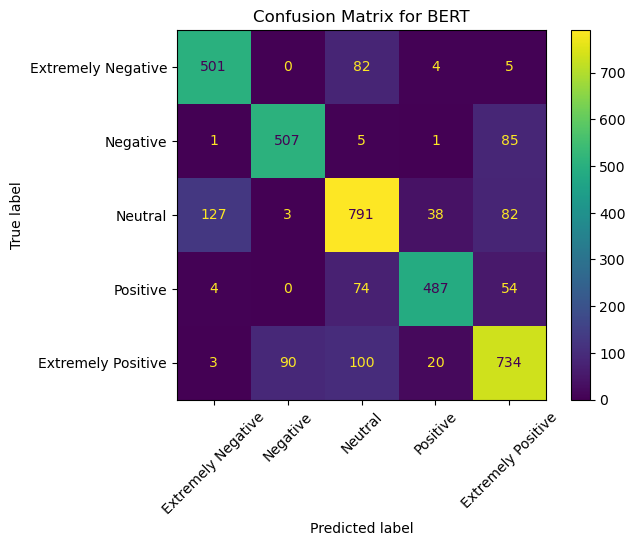

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ax = plt.subplots()[1]
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_testpred_bert,
    display_labels = LABELS,
    ax = ax,
    xticks_rotation = 45
)
ax.title.set_text("Confusion Matrix for BERT")
plt.show()

<h3> EXPLANATION </h3>

Unsurprisingly, the BERT model again performs the best when evaluated on the unseen test data with an accuracy of 80%, while the baseline and LDA models are roughly on par at 54-56% accuracy.

The confusion matrix for the BERT model shows that it does correctly classify the vast majority of tweets, with the main source of confusion coming from the extreme and neutral classes. It often misidentifies neutral tweets as being extremely negative, while also mistaking extremely positive tweets for being neutral or even negative.

This surprised me at first, but I thought of a few reasons why this could have happened. First and foremost, the sentiment of a tweet could easily be changed by just having a single negation. Many tweets also probably do not explicitly use emotive expressions, but simply imply their attitude through the literal message or the context. Also, both sides of extreme tweets likely share "neutral" intensifiers, such as "extremely" or "very", which can be confusing to categorise.

---

## Question 8 (7 points)

When you perform a classification or labeling task, you may want to perform an error analysis to look for avenues for improvement. You can do this both quantitatively and qualitatively.

For your best classifier:
* Collect misclassified samples, e.g. by modifying your evaluation code from Question 7.

Perform a brief quantitative error analysis of your best classifier:
* Choose some properties that you think are relevant to classification quality, such as the length of the tweet or use of emoji. Come up with three interesting properties.
* Compute and compare these three properties for the misclassified samples to the average distribution over all samples.
* Describe your conclusions.

Perform a brief qualitative error analysis of your best classifier:
* Look at the misclassified samples, and make observations about their properties. Identify some properties that you think are relevant to classification quality but that you can't easily quantify, such as usage of sarcasm or irony, negation issues (not bad != bad), spelling or grammar issues, interpretation of emojis, context dependence of the tweet, or other observations.
* Describe your conclusions.


In [11]:
# your code here

wrong_cond = y_testpred_bert != y_test
wrong, correct = X_test[wrong_cond], X_test[~wrong_cond]
# print(len(wrong), len(correct))
for tweet in wrong.head(15):
    print(tweet, end = "\n\n")

print("Average tweet lengths")
print(f"Misclassified:        {np.mean([len(i) for i in wrong])}")
print(f"Correctly classified: {np.mean([len(i) for i in correct])}")

print("\nNumber of hyperlinks")
print(f"Misclassified:        {np.mean([i.count('http') for i in wrong])}")
print(f"Correctly classified: {np.mean([i.count('http') for i in correct])}")

print("\nMentions of COVID")
print(f"Misclassified:        {np.mean([i.count('covid') + i.count('corona') for i in wrong])}")
print(f"Correctly classified: {np.mean([i.count('covid') + i.count('corona') for i in correct])}")

trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold out online grocers foodkick maxdelivery coronavirus fearing shoppers stock httpstcogrpcrlwh httpstcoivmkmsqdt

panic buying hits newyork city anxious shoppers stock foodampmedical supplies after healthcare worker her s becomes bigapple st confirmed coronavirus patient bloomberg staged event  httpstcoiasiregpc  qanon qanon qanon  election cdc httpstcoiszoewxu

drtedros cant stop covid without protecting healthworkers  prices surgical masks have increased six fold n respirators have more than trebled amp gowns cost twice muchdrtedros coronavirus

twitter pharmacist sell hand sanitizer for living when any exists like masks sold the fuck out everywhere should you worried use soap should you visit twenty pharmacies looking for the last bottle pharmacies are full sick people

best quality couches unbelievably low prices available order  are boksburg  for more info whatsapp      supertuesdsy powertalk  cov

<h3> EXPLANATION </h3>

Interestingly, from a qualitative point of view, many wrongly identified tweets relate in some way to the retail/service industry, with frequent mentions of supermarket supply shortages and inflated prices. This could just be a biased sample because I'm only looking at the head, but the nature of this kind of tweet possibly does lead to confusing sentiments, depending on whether someone is complaining or assuaging others.

On the quantitative side, I looked at average tweet lengths, number of hyperlinks per tweet, and mentions of COVID-19. I didn't expect to find strong differences, and indeed, this is true from the dataset. Misclassified tweets tend to be around 15 characters longer than correctly classified tweets, but this is likely not too statistically significant if this translates to a difference of about just 4 or 5 words per tweet.

---